In [268]:
import pandas as pd
import numpy as py
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
import seaborn as sns

train_set = pd.read_csv('train.csv')
train_set_unique = train_set.drop_duplicates(subset = ['label'], keep = 'first')
train_set_unique = train_set_unique.sort_values('label')

#train_set_unique

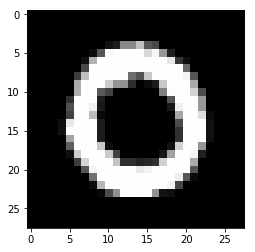

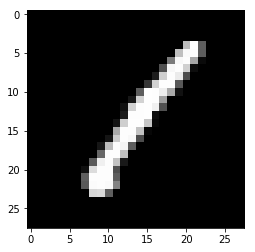

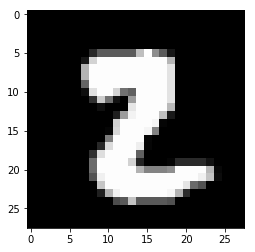

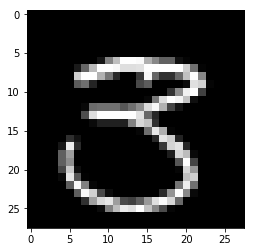

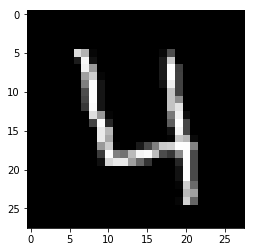

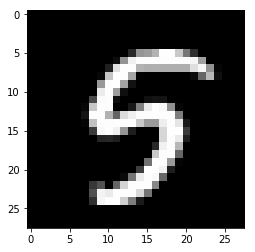

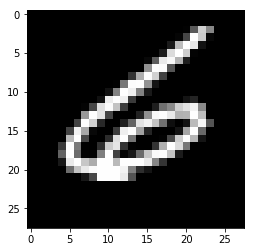

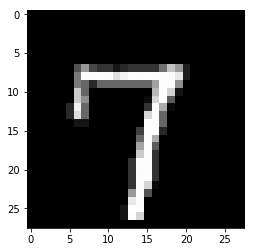

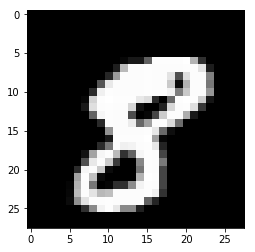

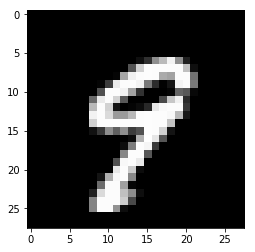

In [269]:
unique_no_label = train_set_unique.drop('label',axis = 1)

# 1(b) Write a function to display an MNIST digit. Display one of each digit.
def display_digits(input_unique_data):
    for i in range(len(input_unique_data)):
        img=input_unique_data.iloc[i].values
        img=img.reshape((28,28))
        plt.imshow(img,cmap='gray')
        plt.show()

display_digits(unique_no_label)

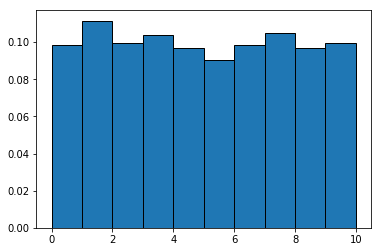

In [270]:
#Examine  the  prior  probability  of  the  classes  in  the  training  data.   Is  it  uniform  across  the
#digits? Display a normalized histogram of digit counts. Is it even?

#It's not uniform across the digits

#Initialize bins for normalized histogram
_bins = []
for x in range(len(unique_no_label)+1):
    _bins.append(x)

norm_hist = plt.hist(train_set['label'], bins=_bins, density=True, edgecolor='black')
#The histogram is not even

#print(norm_hist)
#train_set['label']

In [271]:
#Pick one example of each digit from your training data. Then, for each sample digit, compute
#and show the best match (nearest neighbor) between your chosen sample and the rest of
#the training data. Use L2 distance between the two images’ pixel values as the metric. This
#probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).

#Initialize comparison set
train_set_dropped = train_set
train_set_dropped = train_set_dropped.drop(train_set_dropped.index[train_set_unique.index])

euclidean_out = euclidean_distances(train_set_unique, train_set_dropped)

for x in range(len(unique_no_label)):
    print('min: ' + str(min(euclidean_out[x])))
    train_set_dropped_ind = py.where(euclidean_out[x] == min(euclidean_out[x]))
    print('min index: ' + str(train_set_dropped_ind[0][0]))
    
    print('sample: ' + str(train_set_unique.values[x][0]))
    print('matched: ' + str(train_set_dropped.values[train_set_dropped_ind[0][0]][0]))
    if train_set_unique.values[x][0] == train_set_dropped.values[train_set_dropped_ind[0][0]][0]:
        print('True/Genuine\n')
    else:
        print('False/Imposter\n')

min: 1046.5954328201515
min index: 12940
sample: 0
matched: 0
True/Genuine

min: 489.67948701165744
min index: 29694
sample: 1
matched: 1
True/Genuine

min: 1380.877257398354
min index: 9526
sample: 2
matched: 2
True/Genuine

min: 1832.6660906995578
min index: 8971
sample: 3
matched: 5
False/Imposter

min: 1356.8809822530493
min index: 14777
sample: 4
matched: 4
True/Genuine

min: 1066.3676664265472
min index: 30063
sample: 5
matched: 5
True/Genuine

min: 1446.5113203843239
min index: 16230
sample: 6
matched: 6
True/Genuine

min: 863.5010133172977
min index: 15265
sample: 7
matched: 7
True/Genuine

min: 1593.7775879965184
min index: 32576
sample: 8
matched: 8
True/Genuine

min: 910.5767403135224
min index: 35732
sample: 9
matched: 9
True/Genuine



In [272]:
#Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other
#digits, compute the pairwise distances for all genuine matches and all impostor matches,
#again using the L2 norm. Plot histograms of the genuine and impostor distances on the same
#set of axes.

#Initialize train_sets
train_set_0 = train_set
train_set_1 = train_set

#Drop all rows not matching condition
train_set_0 = train_set_0.loc[~(train_set['label'] != 0)]
train_set_1 = train_set_1.loc[~(train_set['label'] != 1)]

euclidean_out_0_0 = euclidean_distances(train_set_0, train_set_0)
euclidean_out_0_1 = euclidean_distances(train_set_0, train_set_1)
euclidean_out_1_0 = euclidean_distances(train_set_1, train_set_0)
euclidean_out_1_1 = euclidean_distances(train_set_1, train_set_1)

(array([2.0600000e+02, 1.1604000e+04, 2.6532400e+05, 2.3891440e+06,
        9.2090360e+06, 1.4833448e+07, 9.4881640e+06, 2.2744740e+06,
        2.3040000e+05, 6.7760000e+03]),
 array([1291.70855846, 1582.74626988, 1873.78398129, 2164.82169271,
        2455.85940412, 2746.89711554, 3037.93482695, 3328.97253837,
        3620.01024978, 3911.0479612 , 4202.08567262]),
 <a list of 10 Patch objects>)

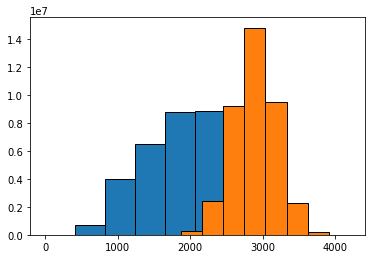

In [273]:
#print(euclidean_out_0_0)
euclidean_out_0_0 = euclidean_out_0_0.flatten()
euclidean_out_1_1 = euclidean_out_1_1.flatten()
euclidean_out_1_0 = euclidean_out_1_0.flatten()
euclidean_out_0_1 = euclidean_out_0_1.flatten()

euclidean_out_imposter = py.concatenate((euclidean_out_0_1, euclidean_out_1_0), axis=None)
euclidean_out_genuine = py.concatenate((euclidean_out_0_0, euclidean_out_1_1), axis=None)

plt.hist(euclidean_out_genuine, edgecolor='black')
plt.hist(euclidean_out_imposter, edgecolor='black')

In [279]:
#metrics.roc_curve(euclidean_out_genuine, [0,1,2])
y = py.array(euclidean_out_genuine)
scores = py.array(euclidean_out_imposter)
metrics.roc_curve(y, scores, pos_label=2)


ValueError: continuous format is not supported

In [ ]:
# Defining our KNN model
'''def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5
'''

def kNN(trainingSet, testSet, k):
    distances = []
    sorted_d = []
    
    length = len(testSet)
    
    for x in range(len(trainingSet)):
        dist = #euclideandistance
        